Import the required libraries

In [25]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

1. Open an image file
2. Read the image file into a numpy array

In [26]:
png_img = cv.imread('standard_test_images/fruits.png', -1)
# png_img = cv.imread('x.png', -1)
## -1 flag is used to read the image as it is, without any changes
png_img.shape

(512, 512, 4)

(512, 512, 3)


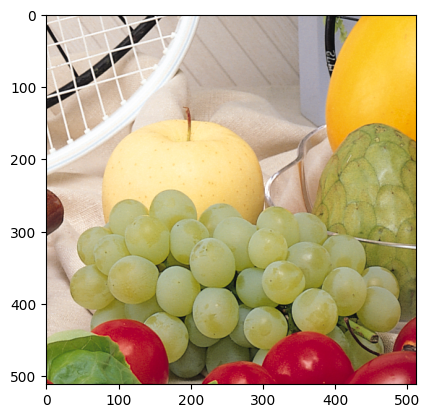

In [27]:
# convert the image to RGB (OpenCV uses BGR)
png_img_rgb = cv.cvtColor(png_img, cv.COLOR_BGR2RGB)
print(png_img_rgb.shape)
# plot image inline with matplotlib
plt.imshow(png_img_rgb)
# plt.axis('off')
plt.show()

3. Filter np array to extract red | green | blue colors from the image and repaint image with only red component and display it

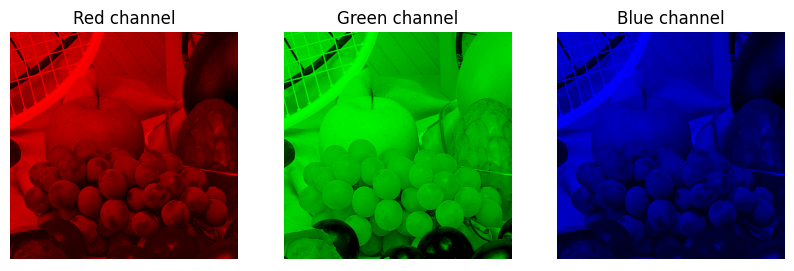

In [28]:
# Ensure the image has 3 channels (RGB), ignoring alpha if present
if png_img_rgb.shape[-1] == 4:  # RGBA
    png_img_rgb = png_img_rgb[:, :, :3]

# create a placeholder image to store the image with only 0 values
zero_channel = np.zeros_like(png_img[:,:,0])

# split the image into its 3 channels
red_channel = png_img[:,:,0]
red_img = cv.merge((red_channel, zero_channel, zero_channel)) 

green_channel = png_img[:,:,1]
green_img = cv.merge((zero_channel, green_channel, zero_channel))

blue_channel = png_img[:,:,0]
blue_img = cv.merge((zero_channel, zero_channel, blue_channel))

# plot the 3 images in a subplot
plt.figure(figsize=(10,3))
plt.axis('off')

plt.subplot(131)
plt.imshow(red_img, cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(green_img, cmap='gray')
plt.title('Green channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_img, cmap='gray')
plt.title('Blue channel')
plt.axis('off')

# plt.axis('off')
plt.show()

Convert the image to grayscale and display it

(512, 512)
Time taken by OpenCV function: 0.0003559589385986328 seconds


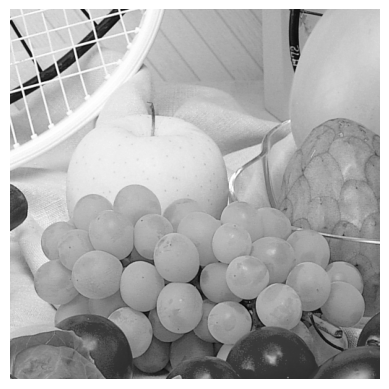

In [29]:
# using existing libaray function and calculate time taken
import time
start = time.time()
gray_img = cv.cvtColor(png_img, cv.COLOR_BGR2GRAY)
print(gray_img.shape)
end = time.time()
diff_lib = end - start
print(f'Time taken by OpenCV function: {diff_lib} seconds')
# the formula to compute average used here is 0.299*R + 0.587*G + 0.114*B
# because the human eye is more sensitive to green color, so it is given more weight
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

Time taken by for loop: 0.3691413402557373 seconds


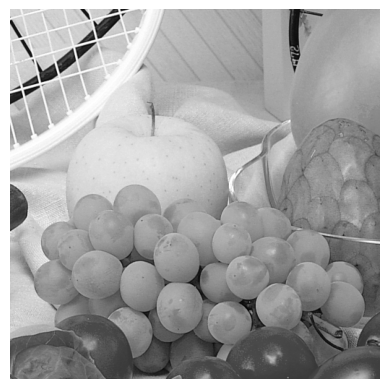

Speedup by using numpy is: 1037.03x


In [30]:
start = time.time()
# using for loop
gray_img = np.zeros((png_img.shape[0], png_img.shape[1]))
for i in range(png_img.shape[0]):
    for j in range(png_img.shape[1]):
        gray_img[i,j] = (png_img[i,j,0]//3 + png_img[i,j,1]//3 + png_img[i,j,2]//3)
end = time.time()
diff_for = end - start
print(f'Time taken by for loop: {diff_for} seconds')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

# time differece
speedup = diff_for/diff_lib
print(f'Speedup by using numpy is: {speedup:.2f}x')

5. draw a histogram of the grayscale image

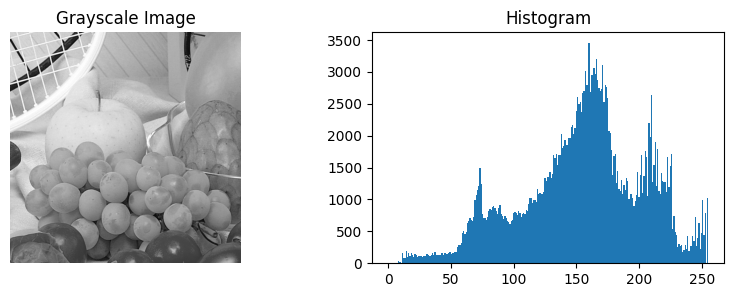

In [31]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Grayscale Image')
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
# plt.show()

plt.subplot(122)
plt.title('Histogram')
plt.hist(gray_img.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
plt.show()

6. Let X be the np matrix of the grayscale image
 - obtain Y = X.T (transpose of X)
 - obtain Z = Y.X (matrix multiplication of Y and X)

In [32]:
X = gray_img
print(f"{X.shape=}")

Y = X.T
print(f"{Y.shape=}")

# multiply Y and X
Z = np.matmul(Y,X)
print(f"{Z.shape=}")

X.shape=(512, 512)
Y.shape=(512, 512)
Z.shape=(512, 512)


7. Obtain a portion of the grayscale image and save it in an array A

In [33]:
P = int(X.shape[0]*.4),int(X.shape[1]*.4)
Q = int(X.shape[0]*.7),int(X.shape[1]*.7)
print(f"{P=}")
print(f"{Q=}")


# crop the image
A = gray_img[P[0]:Q[0], P[1]:Q[1]]



P=(204, 204)
Q=(358, 358)


8. Display the partimage A

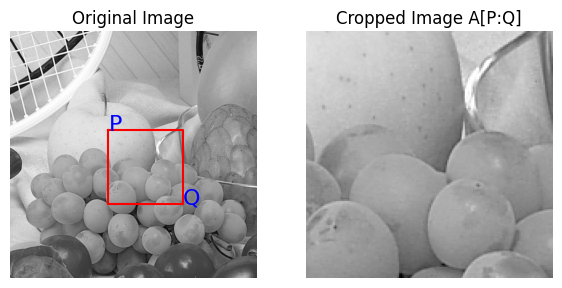

In [39]:
# display the originall and cropped image
plt.figure(figsize=(7,4))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(gray_img, cmap='gray')
# display P and Q on the image
plt.plot([P[1], Q[1], Q[1], P[1], P[1]], [P[0], P[0], Q[0], Q[0], P[0]], 'r')
plt.text(P[1], P[0], 'P', color='b', fontsize=16)
plt.text(Q[1], Q[0], 'Q', color='b', fontsize=16)
plt.axis('off')

plt.subplot(122)
plt.title('Cropped Image A[P:Q]')
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()